>
> # MaaS Sim tutorial
>
> ##External functionalities
>
-----
test how vehicle and driver rejects requests and how to control it via extrnal functions passed to simulator

import simulator

In [ ]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import random

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.traveller import travellerEvent
from MaaSSim.driver import driverEvent
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate

In [3]:
params = get_config('../../data/config/default.json')  # load configuration

In [4]:
params.times.patience = 3600 # 1 hour of simulation
params.simTime = 1 # 1 hour of simulation
params.nP = 10 # reuqests (and passengers)
params.nV = 10 # vehicles
params.nD = 1

functions to reject with probability of 20 and 80% respectively

In [5]:
def rand_reject8(**kwargs):
    return random.random()>=0.8

def rand_reject2(**kwargs):
    return random.random()>=0.2

> no rejects

09-10-20 10:46:19-WARNING-Setting up 1h simulation at 2020-10-09 10:29:47 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:19-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:19-INFO-pax    0  got to dest at                           2020-10-09 10:36:04
09-10-20 10:46:19-INFO-pax    1  got to dest at                           2020-10-09 10:37:03
09-10-20 10:46:19-INFO-pax    2  got to dest at                           2020-10-09 10:39:51
09-10-20 10:46:19-INFO-pax    3  got to dest at                           2020-10-09 10:40:08
09-10-20 10:46:19-INFO-pax    4  got to dest at                           2020-10-09 10:45:21
09-10-20 10:46:19-INFO-pax    5  got to dest at                           2020-10-09 10:51:17
09-10-20 10:46:19-INFO-pax    6  got to dest at                           2020-10-09 10:54:00
09-10-20 10:46:19-INFO-pax    7  got to dest at                           2020-10-09 11:04:58
09-10-20 10:46:19-INFO-pax    9 

<AxesSubplot:ylabel='event'>

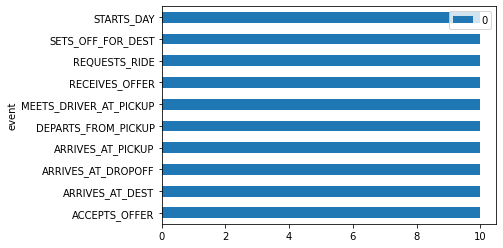

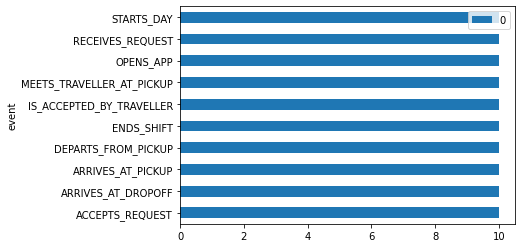

In [6]:
sim = simulate(params = params)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> veh rejects with prob. 20%

09-10-20 10:46:20-WARNING-Setting up 1h simulation at 2020-10-09 10:27:37 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:20-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:20-WARNING-pax    1  got rejected by vehicle 6                2020-10-09 10:29:27
09-10-20 10:46:20-INFO-pax    0  got to dest at                           2020-10-09 10:30:57
09-10-20 10:46:20-INFO-pax    1  got to dest at                           2020-10-09 10:33:45
09-10-20 10:46:20-INFO-pax    2  got to dest at                           2020-10-09 10:37:50
09-10-20 10:46:20-INFO-pax    3  got to dest at                           2020-10-09 10:45:54
09-10-20 10:46:20-INFO-pax    4  got to dest at                           2020-10-09 10:49:42
09-10-20 10:46:20-INFO-pax    5  got to dest at                           2020-10-09 10:53:45
09-10-20 10:46:20-INFO-pax    6  got to dest at                           2020-10-09 10:59:33
09-10-20 10:46:20-WARNING-pax

<AxesSubplot:ylabel='event'>

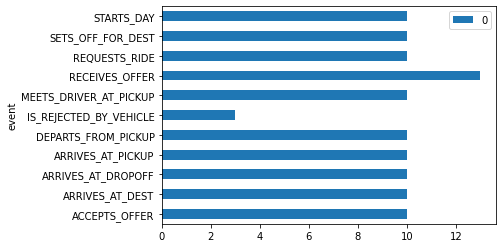

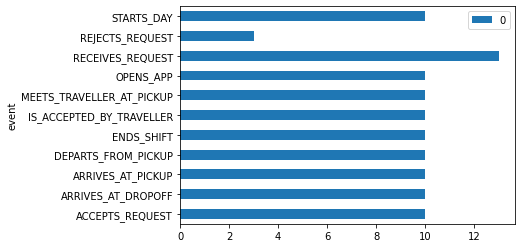

In [7]:
sim = simulate(params = params, f_driver_decline = rand_reject8)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> traveller rejects with prob. 20%

09-10-20 10:46:21-WARNING-Setting up 1h simulation at 2020-10-09 10:31:45 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:21-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:21-INFO-pax    1  got to dest at                           2020-10-09 10:35:08
09-10-20 10:46:21-INFO-pax    0  got to dest at                           2020-10-09 10:39:46
09-10-20 10:46:21-WARNING-pax    3  got rejected by vehicle 4                2020-10-09 10:42:07
09-10-20 10:46:21-INFO-pax    2  got to dest at                           2020-10-09 10:43:46
09-10-20 10:46:21-WARNING-pax    4  got rejected by vehicle 1                2020-10-09 10:48:14
09-10-20 10:46:21-WARNING-pax    4  got rejected by vehicle 1                2020-10-09 10:48:14
09-10-20 10:46:21-INFO-pax    4  rejected vehicle 1                       2020-10-09 10:48:29
09-10-20 10:46:21-INFO-pax    3  got to dest at                           2020-10-09 10:49:38
09-10-20 10:46:21-INFO-

<AxesSubplot:ylabel='event'>

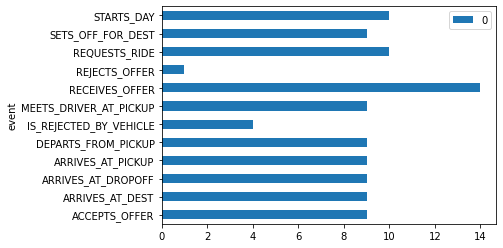

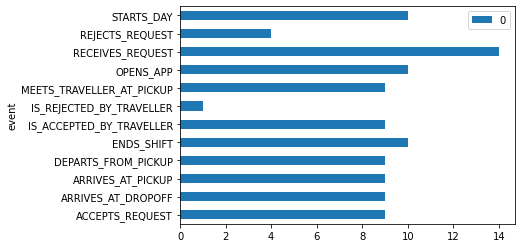

In [8]:
sim =simulate(params = params, f_trav_mode = rand_reject8)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> both reject with prob. 20%

09-10-20 10:46:22-WARNING-Setting up 1h simulation at 2020-10-09 10:20:34 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:23-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:23-WARNING-pax    1  got rejected by vehicle 10               2020-10-09 10:22:36
09-10-20 10:46:23-WARNING-pax    2  got rejected by vehicle 9                2020-10-09 10:27:06
09-10-20 10:46:23-INFO-pax    2  rejected vehicle 9                       2020-10-09 10:27:21
09-10-20 10:46:23-INFO-pax    1  got to dest at                           2020-10-09 10:29:20
09-10-20 10:46:23-INFO-pax    0  got to dest at                           2020-10-09 10:31:19
09-10-20 10:46:23-INFO-pax    3  got to dest at                           2020-10-09 10:38:58
09-10-20 10:46:23-WARNING-pax    5  got rejected by vehicle 8                2020-10-09 10:42:53
09-10-20 10:46:23-INFO-pax    5  rejected vehicle 8                       2020-10-09 10:43:08
09-10-20 10:46:23-INFO-

<AxesSubplot:ylabel='event'>

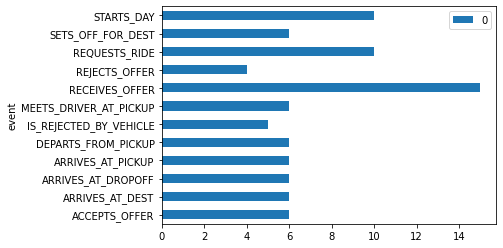

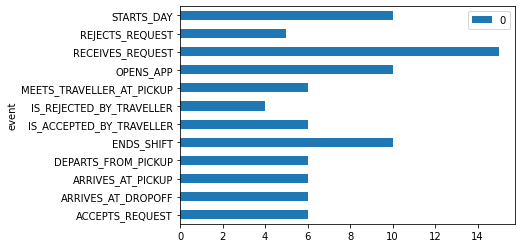

In [9]:
sim = simulate(params = params, f_driver_decline = rand_reject8, f_trav_mode = rand_reject8)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> both reject with prob. 80%

09-10-20 10:46:24-WARNING-Setting up 1h simulation at 2020-10-09 10:24:34 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:24-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20

<AxesSubplot:ylabel='event'>

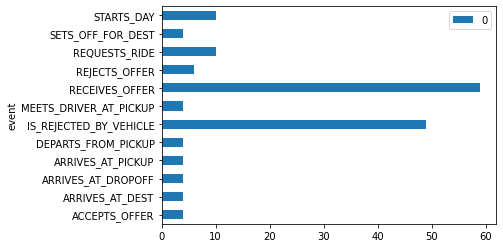

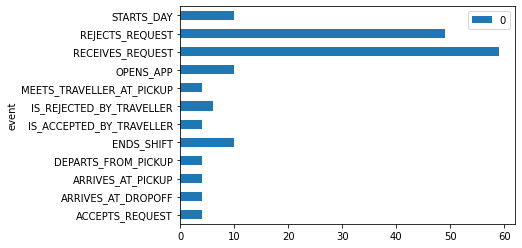

In [10]:
sim = simulate(params = params, f_driver_decline = rand_reject2, f_trav_mode = rand_reject2)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

---